In [2]:
#pandasインポートとデータセット読み込み
import pandas as pd
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
#describe
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
#ダミー変数化処理用関数

def dummylize(df,n_item):
    dum = pd.get_dummies(df[n_item], drop_first = True)
    df = pd.concat((df, dum),axis = 1)
    df = df.drop(n_item,axis = 1)
    return df


#nullを0、それ以外を1とする関数
def booleanize(df,n_item):
    df_tmp = df[n_item].notnull() * 1
    df_tmp.name = n_item

    df = df.drop(n_item,axis = 1)
    df = pd.concat((df, df_tmp), axis = 1)
    return df


#カテゴリを数値化する関数

def categorize(df,n_item):
    labels, uniques = pd.factorize(df[n_item])
    df[n_item] = labels
    return df


In [4]:
#欠損値の数をカウント
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#項目ごとの最大値を取得

n_oldest = df_train.Age.max()
n_oldest

80.0

In [10]:
#Pandasメモ：最大値をもつ行を取得する方法

df_train[df_train.Age==n_oldest]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [7]:
#条件で要素抜出し
df_x = df_train[df_train.Age>=40]
df_x

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S


In [13]:
#項目のある値の出現頻度をカウント

a = df_train.Sex == 'male'
a.sum()

577

In [4]:
#欠損データの行削除
df_tmp = df_train.dropna()

#不要行削除
df_tmp = df_tmp.drop('PassengerId',axis = 1)
df_tmp = df_tmp.drop('Name',axis = 1)
df_tmp = df_tmp.drop('Ticket',axis = 1)
df_tmp = df_tmp.drop('Cabin',axis = 1)

#相関係数
df_tmp.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


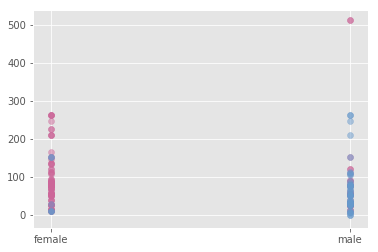

In [5]:
#性別・年代別の生存率を散布図プロット

import matplotlib.pyplot as plt
plt.style.use('ggplot')

df_draw = df_tmp[df_tmp.Survived==1]
df_age = df_draw.iloc[:,2]
df_sex = df_draw.iloc[:,6]
plt.scatter(df_age,df_sex, color='#cc6699',alpha=0.5)

df_draw = df_tmp[df_tmp.Survived==0]
df_age = df_draw.iloc[:,2]
df_sex = df_draw.iloc[:,6]
plt.scatter(df_age,df_sex, color='#6699cc',alpha=0.5)

plt.show()



In [14]:
#キャビン番号が分かっているケースと不明のケースの生存率比較

cabin_known_ratio = len(df_train[((df_train.Cabin.isnull()==False) & (df_train.Survived == 1))]) / len(df_train[df_train.Cabin.isnull()==False])
cabin_unknown_ratio = len(df_train[((df_train.Cabin.isnull()) & (df_train.Survived == 1))]) / len(df_train[df_train.Cabin.isnull()])

print(cabin_known_ratio)
print(cabin_unknown_ratio)

0.6666666666666666
0.29985443959243085


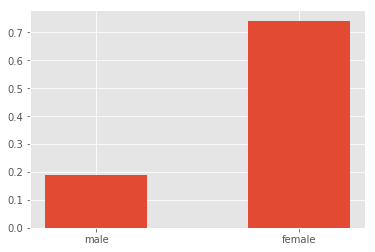

In [6]:
#男女生存率を比較

male_survived_ratio = len(df_train[(df_train.Sex == 'male') & (df_train.Survived == 1)]) / len(df_train[df_train.Sex == 'male'])
female_survived_ratio = len(df_train[(df_train.Sex == 'female') & (df_train.Survived == 1)]) / len(df_train[df_train.Sex == 'female'])
sex_survived_ratio = [male_survived_ratio, female_survived_ratio]
plt.bar([0,1], sex_survived_ratio, tick_label=['male', 'female'], width=0.5)
plt.show()

[0.6071428571428571, 0.1282051282051282, 0.16296296296296298, 0.2222222222222222, 0.18867924528301888, 0.14285714285714285, 0.13333333333333333, 0.0, 1.0] [0.7307692307692307, 0.7105263157894737, 0.7230769230769231, 0.8518518518518519, 0.6666666666666666, 0.8888888888888888, 1.0, 0.5, 0.5]


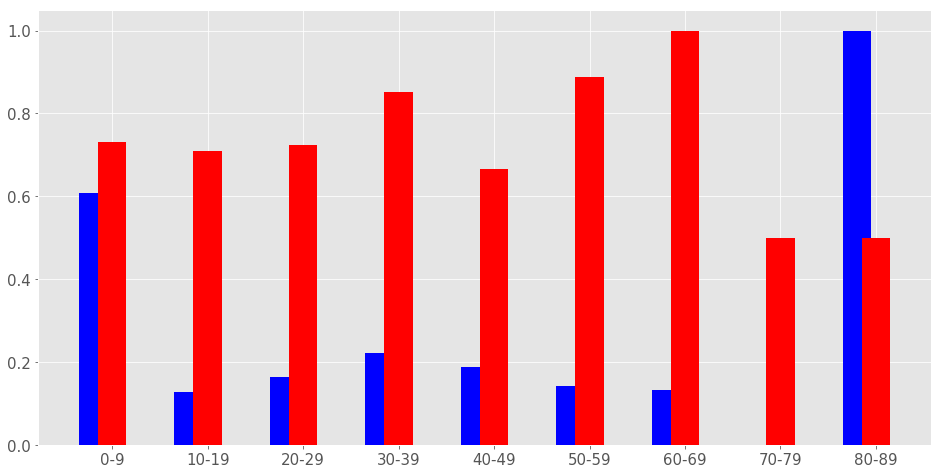

In [7]:
#年代別　男女生存比率　比較チャート

male_df = df_train[df_train.Sex == 'male']
female_df = df_train[df_train.Sex == 'female']

male_age_survived_ratio_list = []
female_age_survived_ratio_list = []
for i in range(0, int(max(df_train.Age))+1, 10):
    male_df_of_age = male_df[(male_df.Age >= i) & (male_df.Age < i+9)]
    female_df_of_age = female_df[(female_df.Age >= i) & (female_df.Age < i+9)]

    male_s = len(male_df_of_age[male_df_of_age.Survived == 1])
    female_s = len(female_df_of_age[female_df_of_age.Survived == 1])

    male_total = len(male_df_of_age)
    female_total = len(female_df_of_age)

    if male_total  == 0:
        male_age_survived_ratio_list.append(0.5)
    else:
        male_age_survived_ratio_list.append(male_s/male_total)

    if female_total == 0:
        female_age_survived_ratio_list.append(0.5)
    else:
        female_age_survived_ratio_list.append(female_s/female_total)

print(male_age_survived_ratio_list, female_age_survived_ratio_list)

x_labels = []
for i in range(0, int(max(df_train.Age))+1, 10):
    x_labels.append(str(i) + '-' + str(i+9))

plt.figure(figsize=(16,8))
x1 = [i for i in range(0, int(max(df_train.Age))+ 1, 10)]
x2 = [i + 2 for i in range(0, int(max(df_train.Age))+ 1, 10)]
plt.bar(x1, male_age_survived_ratio_list, tick_label=x_labels, width=3, color='blue')
plt.bar(x2,female_age_survived_ratio_list, tick_label=x_labels, width=3, color='red')
plt.tick_params(labelsize = 15)
plt.show()

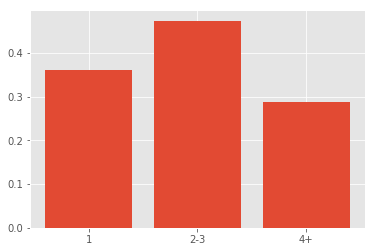

In [16]:

#ファミリーネーム抜出し

l_names = [x.replace(",","").replace(".","").split(" ") for x in df_train.Name.values.tolist()]
l_family = [x[0] for x in l_names]
df_family = pd.Series(l_family, name = "Family")

#ファミリーネームの列を追加

df_train = pd.concat((df_train, df_family), axis = 1)
df_train.head()

#ファミリーネームの出現回数列を追加

n_family = df_train.Family.apply(lambda x: (df_train.Family == x).sum())
n_family.name = 'FamilyNum'
df_train = pd.concat((df_train, n_family), axis = 1)
#家族の構成人数ごとの生存率比較

f1_ratio = len(df_train[((df_train.FamilyNum == 1) & (df_train.Survived == 1))]) / len(df_train[df_train.FamilyNum == 1])
f23_ratio = len(df_train[((df_train.FamilyNum >= 2) & (df_train.FamilyNum <= 3) & (df_train.Survived == 1))]) / len(df_train[((df_train.FamilyNum >= 2) & (df_train.FamilyNum <= 3))])
f4_ratio = len(df_train[((df_train.FamilyNum >= 4) & (df_train.Survived == 1))]) / len(df_train[df_train.FamilyNum >= 4])

l_ratios = []
l_ratios.append(f1_ratio)
l_ratios.append(f23_ratio)
l_ratios.append(f4_ratio)
l_ratios

plt.bar(['1','2-3','4+'],l_ratios)
plt.show()